In [1]:
#Third project 
#PCA and KMeans clustering

In [2]:
#importing few necessary libraries nd functions
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans


In [3]:
#reading the dataset 
social = pd.read_csv("C:/Users/neant/OneDrive/Desktop/Projects/Social/Live.csv")
social.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
#Checking the dimensions/ shape of the dataset 
social.shape

(7050, 16)

In [5]:
#There are 7050 rows and 16 columns 

In [6]:
#exploring the data set 
#checking for null values 

social.isnull().sum().sort_values()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
#From the above output, Column 1, column 2 and Column 2 does not contain any data, dropping these columns 
social = social.drop(["Column1","Column2","Column3","Column4"], axis=1)
#checking if they are dropped 
social.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [8]:
#status-id is not a useful feature dropping it 
social = social.drop('status_id', axis =1)
#verying the drop
social.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


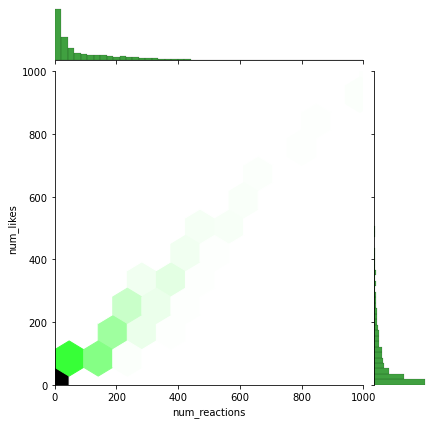

In [9]:
#EDA 
#jointplot between the number of reactions and the number of comments 
import seaborn as sns
sns.jointplot(x='num_reactions', y= 'num_likes',data = social, kind = 'hex', color = 'green')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

<AxesSubplot:>

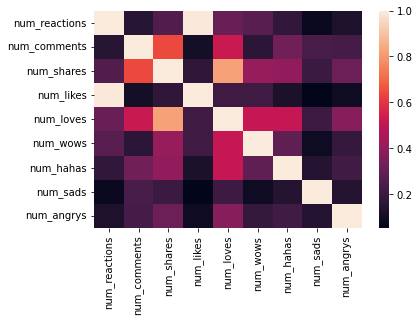

In [10]:
#checking correlation with a heatmap 
sns.heatmap(social.corr())

In [11]:
#from the above, the date and time doesn't seem to be a relevant factor, dropping it 
social = social.drop('status_published',axis =1) 
#veryfying the drop 
social.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


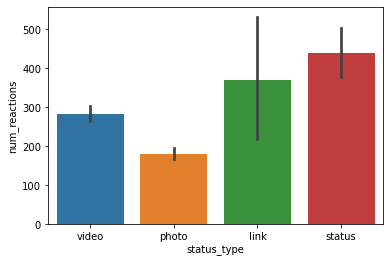

In [12]:
#check the number of reations on  each type of status
sns.barplot(x='status_type', y = 'num_reactions',  data = social)
plt.show()

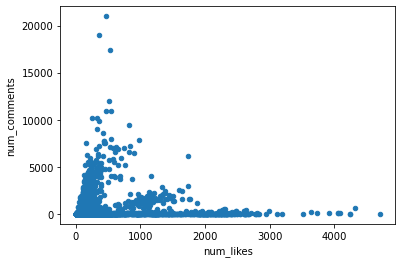

In [13]:
#checking the relation between the number of likes and the number of  comments 
social.plot('num_likes','num_comments', kind= 'scatter')
plt.show()


In [14]:
#seems like there is no obvious relation 

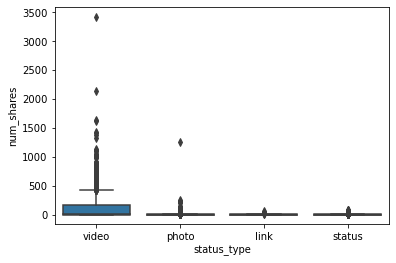

In [15]:
sns.boxplot(x='status_type',y= 'num_shares', data = social)
plt.show()

In [16]:
#Converting the categorical variables to numeric 
social = pd.get_dummies(social, drop_first = True)
#Verifying the conversion 
social.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,1
1,150,0,0,150,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,1,0,0


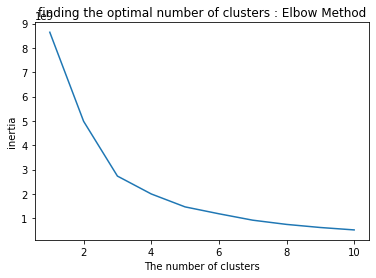

In [17]:
#Clustering using KMeans 
#Finding the optimal number of clusters using the elbow method 
cluster = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(social)
    cluster.append(kmeans.inertia_)
plt.plot(range(1,11),cluster)
plt.title("finding the optimal number of clusters : Elbow Method")
plt.xlabel("The number of clusters")
plt.ylabel("inertia")
plt.show()
    

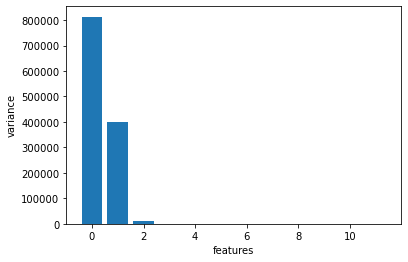

In [18]:
#Reducing dimensions with PCA before fitting the KMeans model
#Instatiating 
pca = PCA()
#fit to the data 
pca.fit(social)
#Creating a range enumerating the PCA features
features = range(pca.n_components_)
#Generating a visualization 
plt.bar(features, pca.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')
plt.show()

In [19]:
#taking only 2 the first 2 features as they are the only once with high variance 
#instantiating again 
pca = PCA(n_components =2 )
pca.fit(social)
transformed = pca.transform(social)
print(transformed.shape)

(7050, 2)


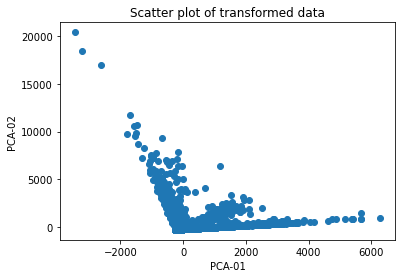

In [20]:
#Plotting the scatter plot of the transformed data
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter plot of transformed data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()


In [21]:
#Instantiating KMeans with 5 clusters 
kmeans = KMeans(n_clusters = 5)
#building a pipeline 
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(pca,kmeans)
#fitting the model 
model = pipe.fit(social)
model

labels = model.predict(social)

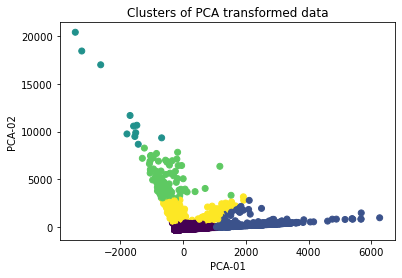

In [23]:
xs = transformed[:,0]
ys = transformed[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Clusters of PCA transformed data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

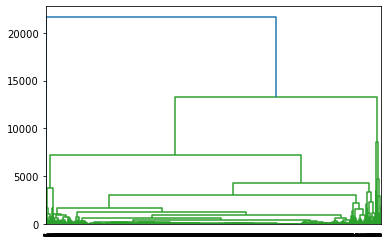

<Figure size 2880x1440 with 0 Axes>

In [31]:
#Hierarchical clustering 
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(transformed, method = 'complete')
dendrogram(mergings, labels = labels, leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize=(40, 20))
plt.show()